In [1]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, mean_squared_error,
    r2_score, mean_absolute_percentage_error
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# A1: Confusion Matrix & Metrics
def evaluate_classification_model(y_true_train, y_pred_train, y_true_test, y_pred_test):
    cm_train = confusion_matrix(y_true_train, y_pred_train)
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    report_train = classification_report(y_true_train, y_pred_train, output_dict=True)
    report_test = classification_report(y_true_test, y_pred_test, output_dict=True)
    return cm_train, report_train, cm_test, report_test


# A2: Regression Error Metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2


# A3: Generate Training Data
def generate_training_data(seed=42):
    np.random.seed(seed)
    X = np.random.randint(1, 11, size=(20, 2))
    y = np.array([0 if x[0] + x[1] < 12 else 1 for x in X])
    return X, y

def plot_training_data(X, y):
    colors = ['blue' if label == 0 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.title("A3: Training Data Scatter Plot")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()


# A4: kNN Classification on Dense Grid
def generate_test_data():
    x_range = np.arange(0, 10.1, 0.1)
    xx, yy = np.meshgrid(x_range, x_range)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    return grid_points, xx, yy

def classify_test_data(knn_model, test_points):
    return knn_model.predict(test_points)

def plot_test_data(xx, yy, predictions):
    zz = predictions.reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.title("A4: kNN Classification on Test Grid")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


# A5: Repeat for multiple k
def knn_boundary_variation(X_train, y_train, test_points, xx, yy, k_values):
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(test_points)
        zz = preds.reshape(xx.shape)
        plt.contourf(xx, yy, zz, alpha=0.5, cmap=plt.cm.coolwarm)
        plt.title(f"A5: Decision Boundary for k={k}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

# A6: Train-test split + accuracy evaluation
def evaluate_accuracy_on_split(X, y, k=3):
    """Splits data, trains kNN with given k, and returns test accuracy."""
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    accuracy = accuracy_score(y_test_split, y_pred)
    return accuracy


# A7: Hyperparameter Tuning (Fixed for small dataset)
def tune_k_using_gridsearch(X, y):
    max_k = min(len(X) // 5, 10)  # limit k to avoid errors
    param_grid = {'n_neighbors': list(range(1, max_k + 1))}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid.fit(X, y)
    return grid.best_params_, grid.best_score_


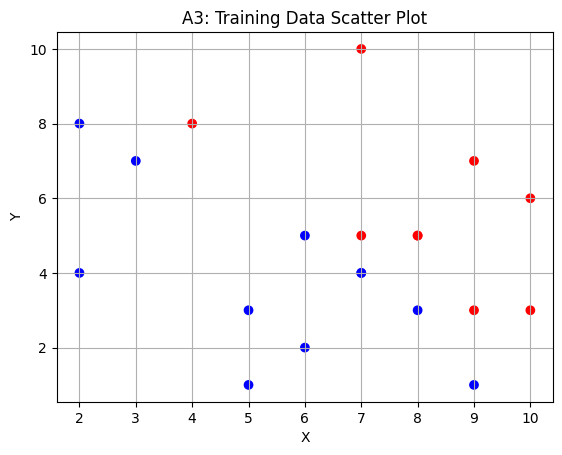

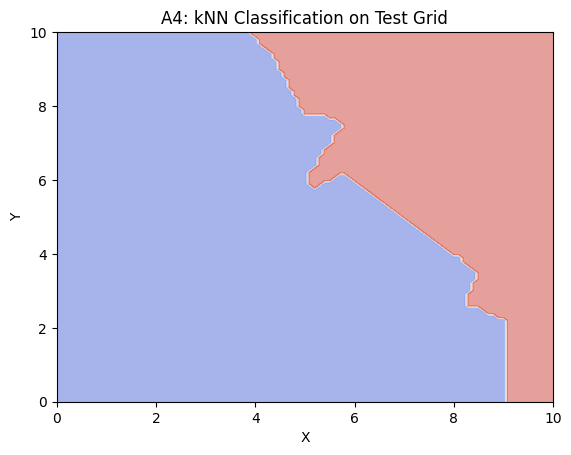

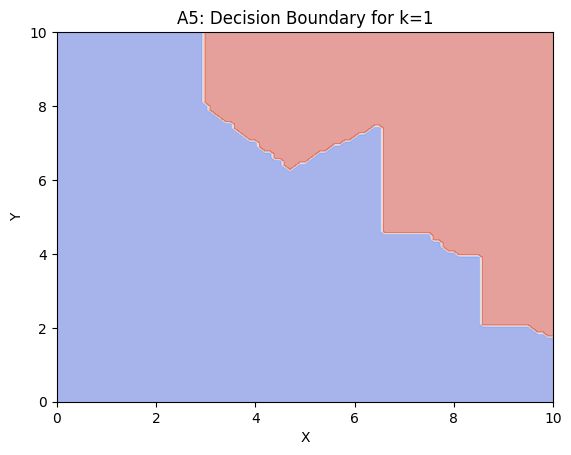

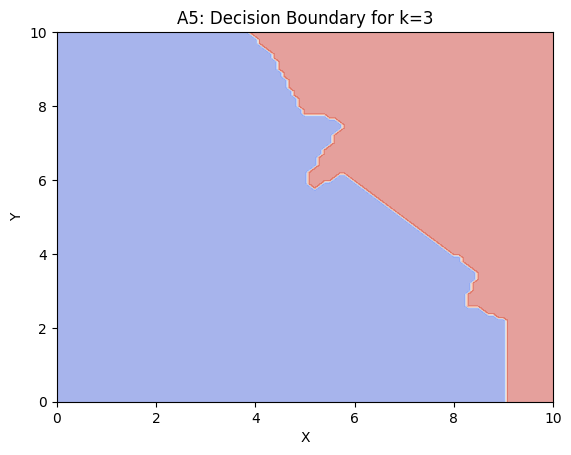

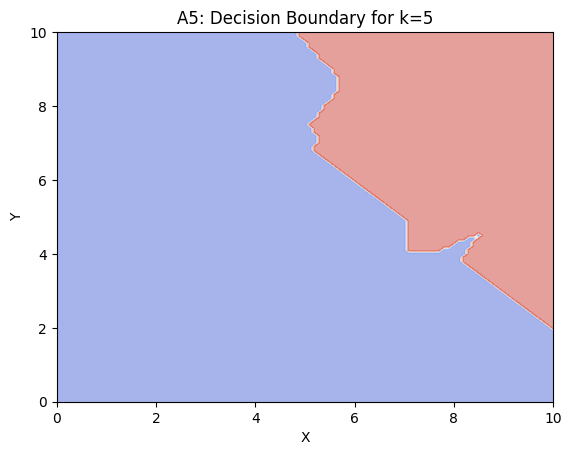

Test Accuracy (k=3): 0.33
Best k: {'n_neighbors': 2}, Best CV Score: 0.8


In [10]:
# A3
X_train, y_train = generate_training_data()
plot_training_data(X_train, y_train)

# A4
test_points, xx, yy = generate_test_data()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
preds_test = classify_test_data(knn, test_points)
plot_test_data(xx, yy, preds_test)

# A5
knn_boundary_variation(X_train, y_train, test_points, xx, yy, k_values=[1, 3, 5])

# Assume you've already done:
X, y = generate_training_data()

# A6: Call the accuracy evaluator
test_accuracy = evaluate_accuracy_on_split(X, y, k=3)
print(f"Test Accuracy (k=3): {test_accuracy:.2f}")


# A7 (Fixed)
best_k, best_score = tune_k_using_gridsearch(X_train, y_train)
print(f"Best k: {best_k}, Best CV Score: {best_score}")
